# One-Class SVM (Support Vector Machine)

One-Class SVM (Support Vector Machine) is a popular method for anomaly detection. It learns a boundary that encompasses the normal data points and can then identify points that fall outside this boundary as anomalies. 

Usually, SVMs aim to generalize from some input data. With this, they can decide whether any additional data are outliers or not. Basic SVMs do this by separating data into several classes. From there, they can decide which class any subsequent data belongs to.

Support Vector Machine (SVM) is a supervised learning technique. It is used for classification and regression tasks by finding the optimal hyperplane (that is boundry) that separates different classes in the feature space.

**One-Class SVMs** are similar, but there is only one class. Therefore, a boundary is decided on using the available data. Any new data that lies outside that boundary is classed as an outlier.

One-class SVM is a variation of the standard SVM that is used for unsupervised learning, specifically for anomaly detection. Instead of trying to separate two or more classes, one-class SVM tries to find a decision boundary that separates the normal data points from the outliers or anomalies. It learns the characteristics of the normal data and identifies instances that deviate significantly from the norm.


We’ll explore how SVMs perform outlier detection and illustrate its utility with a simple example.
 
Let's create a synthetic dataset representing financial transactions, with features such as Amount (transaction amount) and Duration (transaction duration in minutes). We'll apply One-Class SVM to identify anomalies in these transactions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Set random seed for reproducibility
np.random.seed(42)

## Step 1: Generate Synthetic Data

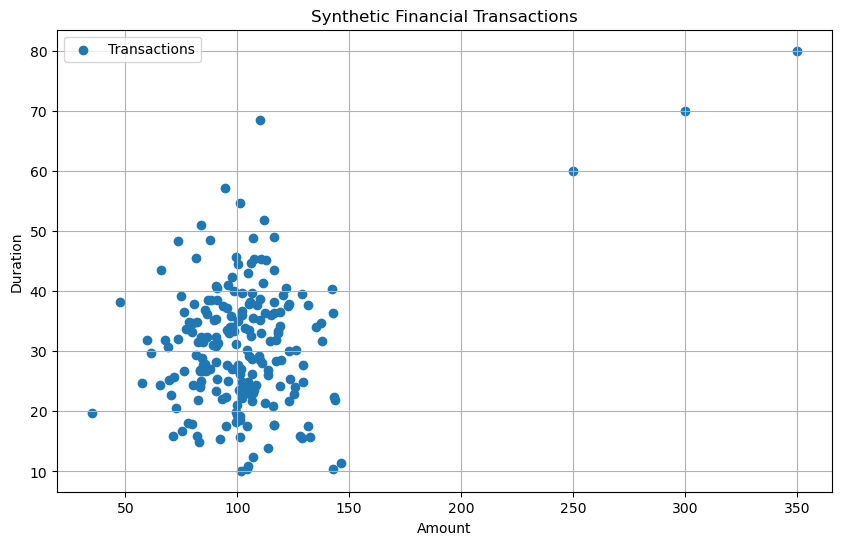

In [2]:
# Generate synthetic data for normal transactions
normal_transactions = np.random.normal(loc=[100, 30], scale=[20, 10], size=(200, 2))

# Generate synthetic data for anomalous transactions
anomalous_transactions = np.array([[250, 60], [300, 70], [350, 80]])

# Combine the data and create a DataFrame
data = np.vstack([normal_transactions, anomalous_transactions])
df = pd.DataFrame(data, columns=['Amount', 'Duration'])

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Duration'], label='Transactions')
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('Synthetic Financial Transactions')
plt.legend()
plt.grid(True)
plt.show()

## Step 2: Apply One-Class SVM

### Sensitivity to hyperparameters
The performance of the One-Class SVM model can be sensitive to its hyperparameters, particularly `nu` and `gamma`. 

For example, try `OneClassSVM(nu=0.1, gamma=0.1)` - the results would not look good for our example data. If the output looks random, it might be due to inappropriate hyperparameter values for your dataset. Try adjusting these parameters to see if we can improve the results.

### Adjusting Hyperparameters

- `nu`:  This parameter represents an upper bound on the fraction of training errors and a lower bound on the fraction of support vectors. It should be between 0 and 1. A smaller value of `nu` will result in fewer anomalies being detecte
- `gamma`:  This parameter defines the influence of a single training example. A low value of gamma will consider points far away from the decision boundary, while a high value will focus more on the points close to the decision bounda

Finding the optimal values for nu and gamma can be challenging. You might need to experiment with different values to see which ones work best for your data. In practice, you can use techniques like grid search or cross-validation to systematically explore different combinations of hyperparameters and select the ones that yield the best performance.ry.

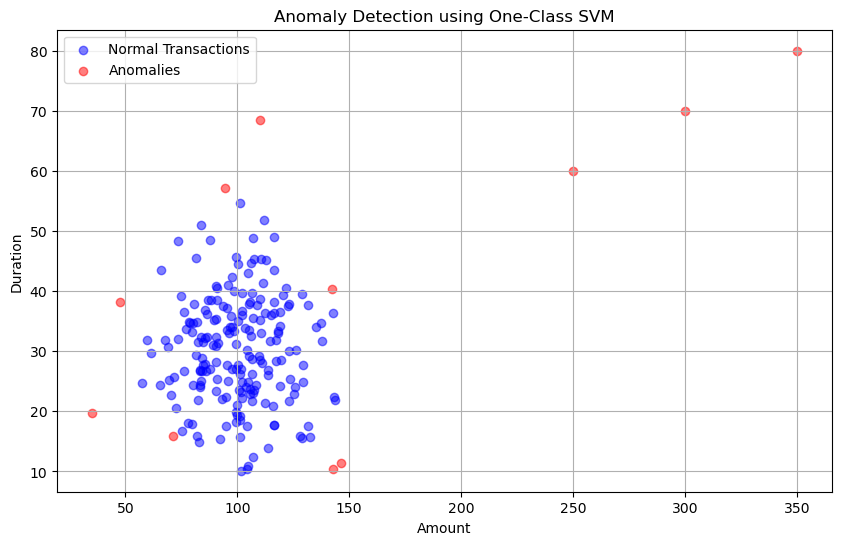

In [21]:
# Apply One-Class SVM
oc_svm = OneClassSVM(nu=0.05)
df['Anomaly'] = oc_svm.fit_predict(df[['Amount', 'Duration']])

# Plot the transactions and anomalies
plt.figure(figsize=(10, 6))
# Plot normal transactions (Anomaly == 1)
plt.scatter(df.loc[df['Anomaly'] == 1, 'Amount'], df.loc[df['Anomaly'] == 1, 'Duration'], c='blue', label='Normal Transactions',alpha=0.5)
# Plot anomalies (Anomaly == -1)
plt.scatter(df.loc[df['Anomaly'] == -1, 'Amount'], df.loc[df['Anomaly'] == -1, 'Duration'], c='red', label='Anomalies',alpha=0.5)
plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('Anomaly Detection using One-Class SVM')
plt.legend()
plt.grid(True)
plt.show()


In this plot, the points are colored based on whether they are considered normal (blue) or anomalous (red) by the One-Class SVM algorithm.

In [22]:
df

,Amount,Duration,Anomaly
0,109.934283,28.617357,1
1,112.953771,45.230299,1
2,95.316933,27.658630,1
3,131.584256,37.674347,1
4,90.610512,35.425600,1
...,...,...,...
198,65.737309,43.538724,1
199,97.709203,42.378163,1
200,250.000000,60.000000,-1
201,300.000000,70.000000,-1


## Visualizing the Decision Boundary

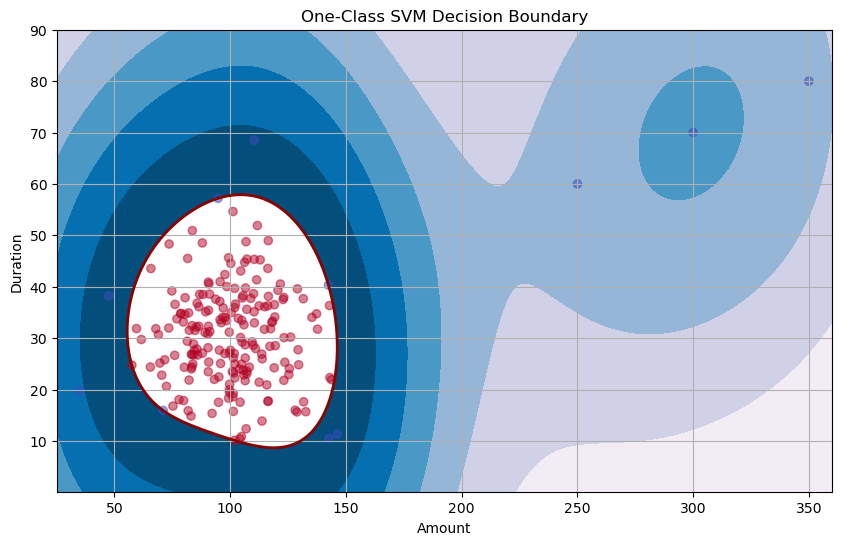

In [27]:
# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(df['Amount'].min() - 10, df['Amount'].max() + 10, 500),
                     np.linspace(df['Duration'].min() - 10, df['Duration'].max() + 10, 500))

# Predict the decision function for each point in the meshgrid
mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Amount', 'Duration'])
Z = oc_svm.decision_function(mesh_data)
Z = Z.reshape(xx.shape)

# Plot the decision boundary and margins
# also, try different colomaps through 'cmap' parameter
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(df['Amount'], df['Duration'], c=df['Anomaly'], cmap='coolwarm',alpha=0.5)

plt.xlabel('Amount')
plt.ylabel('Duration')
plt.title('One-Class SVM Decision Boundary')
plt.grid(True)
plt.show()


In this visualization, the blue shaded area represents the region where normal transactions are expected to lie, according to the One-Class SVM model. The red contour line marks the decision boundary, separating normal transactions from anomalies. Transactions that fall outside the boundary are considered anomalies.

By using One-Class SVM, you can effectively detect anomalies in financial transactions or other types of data. The decision boundary learned by the model provides a clear criterion for distinguishing between normal and anomalous behavior.